In [1]:
#Unsupervised Clustering 
#mall.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To laod Dataset 
df=pd.read_csv("mall.csv")
#To show first 5 records
df.head()  #unit thousand dollar

INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163

In [3]:
#How many rows and columns
df.shape

(303, 2)

In [4]:
#to check null values in given dataset
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [5]:
#To check datatypes of each columns
df.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [6]:
X=df[["INCOME","SPEND"]] #2d ARRAY (INPUT)
X

INCOME  SPEND
0       233    150
1       250    187
2       204    172
3       236    178
4       354    163
..      ...    ...
298     241    123
299     264    132
300     193    141
301     131    115
302     236    174

[303 rows x 2 columns]

In [7]:
#Apply StandardScaler on Input columns 
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
for col in X:
    df[col]=ss.fit_transform(df[[col]])

In [8]:
df.head()

INCOME     SPEND
0 -0.253492  0.015443
1  0.097607  1.633471
2 -0.852427  0.977514
3 -0.191534  1.239897
4  2.245510  0.583939

In [9]:
#Find how many clusters in given dataset , use ELBOW Method 
#KMeans inbuilt class 
from sklearn.cluster import KMeans

In [10]:
#declare 2 empty list 
K_cluster=[] #hold the clusters
SSE=[] #sum of squared error for each cluster
for k in range(1,21): #start=1 stop=21-1=20 step=+1
    #create the object of KMeans class
    km=KMeans(n_clusters=k,random_state=1) #first time k=1
    km.fit(df[['INCOME','SPEND']])
    #HOLD SUM OF SQUARED ERROR on list SSE
    SSE.append(km.inertia_)
    #interia_ inbuilt attributes of KMeans class which hold error for 
    #each cluster
    #And add valueof k in K_cluster list
    K_cluster.append(k)

In [11]:
dict={'K':K_cluster,'SSE':SSE}
df1=pd.DataFrame(dict)
df1

K         SSE
0    1  606.000000
1    2  401.224978
2    3  253.610633
3    4  199.409028
4    5  155.787143
5    6  131.552102
6    7  114.717358
7    8  101.862759
8    9   89.326286
9   10   81.851428
10  11   72.821173
11  12   66.132061
12  13   62.087660
13  14   56.482589
14  15   52.807799
15  16   48.930447
16  17   45.223335
17  18   43.809230
18  19   39.969635
19  20   38.252047

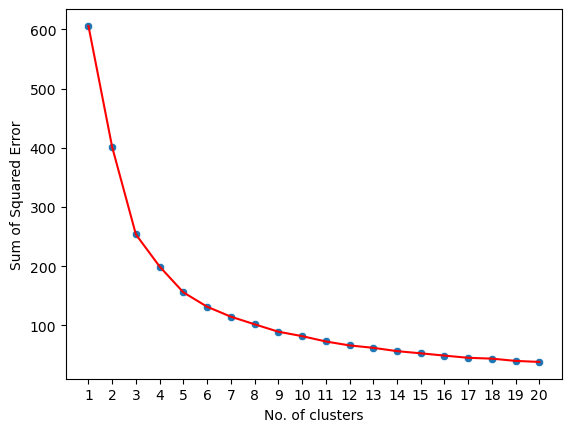

In [12]:
#Visualise scatterplot between K & SSE 
sns.scatterplot(data=df1,x='K',y='SSE')
sns.lineplot(data=df1,x='K',y='SSE',color='red')
plt.xticks(df1['K'])
plt.xlabel("No. of clusters")
plt.ylabel("Sum of Squared Error")

plt.show()

In [13]:
#no. of clusters in given dataset k=5 (0 1 2 3 4)

In [14]:
df.head(10)

INCOME     SPEND
0 -0.253492  0.015443
1  0.097607  1.633471
2 -0.852427  0.977514
3 -0.191534  1.239897
4  2.245510  0.583939
5 -1.100262 -0.072018
6  1.006335  0.146634
7  0.366095  1.021244
8 -0.955692  0.540209
9 -1.595932  1.064975

In [15]:
#create object of KMeans class 
km=KMeans(n_clusters=5,random_state=1)

In [16]:
#fit_predict() inbuilt method of KMeans class 
Y_pred=km.fit_predict(df) #use distance method

In [17]:
Y_pred

array([3, 2, 2, 2, 1, 0, 1, 3, 2, 2, 3, 3, 3, 0, 1, 2, 1, 0, 2, 3, 3, 2,
       2, 3, 2, 1, 2, 0, 1, 2, 2, 0, 2, 3, 0, 2, 1, 2, 3, 1, 1, 2, 3, 3,
       1, 1, 2, 3, 0, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 0, 2, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 1, 1, 1, 4, 3, 3, 2,
       2, 4, 2, 2, 2, 1, 0, 0, 1, 3, 1, 2, 2, 3, 2, 2, 2, 0, 0, 3, 3, 3,
       1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 4, 2, 3, 3, 2, 2, 0, 3, 2, 4, 2, 3,
       1, 3, 1, 3, 0, 0, 0, 4, 1, 1, 2, 3, 0, 3, 3, 2, 2, 0, 3, 0, 3, 3,
       3, 0, 2, 2, 3, 2, 2, 1, 2, 2, 2, 4, 0, 3, 3, 2, 3, 2, 1, 2, 0, 0,
       3, 1, 0, 4, 1, 0, 1, 2, 4, 1, 3, 4, 2, 2, 1, 0, 0, 3, 2, 1, 3, 3,
       4, 3, 2, 3, 4, 3, 0, 3, 3, 3, 0, 2, 3, 3, 0, 1, 3, 1, 4, 1, 4, 3,
       1, 0, 1, 4, 4, 0, 4, 0, 1, 4, 3, 4, 1, 4, 4, 1, 1, 1, 1, 3, 4, 3,
       0, 4, 0, 3, 1, 4, 2, 3, 4, 3, 4, 4, 4, 1, 4, 0, 3, 2, 2, 3, 4, 3,
       0, 0, 4, 0, 4, 4, 3, 3, 4, 3, 4, 2, 0, 3, 1, 0, 4, 2, 0, 2, 0, 4,
       2, 2, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 4, 4, 0,

In [18]:
#add Y_pred on existing dataset df
df['Target']=Y_pred  #df['new columnname']=variable
df.head(10)

INCOME     SPEND  Target
0 -0.253492  0.015443       3
1  0.097607  1.633471       2
2 -0.852427  0.977514       2
3 -0.191534  1.239897       2
4  2.245510  0.583939       1
5 -1.100262 -0.072018       0
6  1.006335  0.146634       1
7  0.366095  1.021244       3
8 -0.955692  0.540209       2
9 -1.595932  1.064975       2

In [19]:
df.shape

(303, 3)

In [20]:
#create 5 dataframe acording to clusters
df0=df[df['Target']==0]
df1=df[df['Target']==1]
df2=df[df['Target']==2]
df3=df[df['Target']==3]
df4=df[df['Target']==4]

In [21]:
df0.head()

INCOME     SPEND  Target
5  -1.100262 -0.072018       0
13 -0.707857 -0.246940       0
17 -0.398063 -1.558855       0
27 -1.451362 -1.165281       0
31 -1.410056 -0.421862       0

In [22]:
len(df1)

50

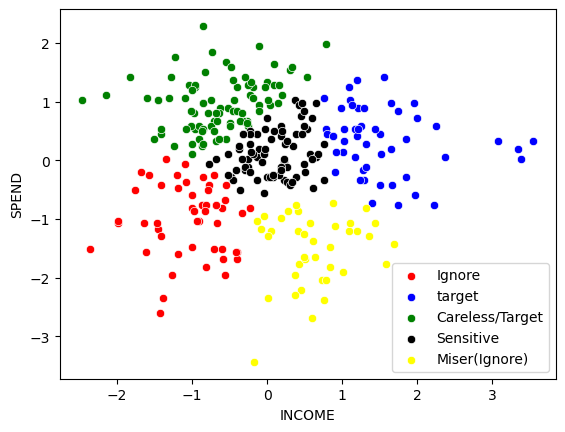

In [23]:
sns.scatterplot(data=df0,x="INCOME",y="SPEND",color="red",label="Ignore")
sns.scatterplot(data=df1,x="INCOME",y="SPEND",color="blue",label="target")
sns.scatterplot(data=df2,x="INCOME",y="SPEND",color="green",label="Careless/Target")
sns.scatterplot(data=df3,x="INCOME",y="SPEND",color="black",label="Sensitive")
sns.scatterplot(data=df4,x="INCOME",y="SPEND",color="yellow",label="Miser(Ignore)")
plt.show()

In [24]:
print(len(df0))
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df4))

50
50
86
78
39


In [25]:
#To check centroid for each clusters 
#use inbuilt attributes of KMeans class , cluster_centers_
print(km.cluster_centers_)

[[-1.03582484 -1.00172876]
 [ 1.53298482  0.33205164]
 [-0.64637809  0.96937799]
 [ 0.08172032  0.11916257]
 [ 0.62452131 -1.51736748]]
